In [5]:
# Dependencies

import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from pprint import pprint

# 1. Data Preparation

### Load data

In [6]:
data = pd.read_csv("./unique_indicators.csv")
data.shape

(1343, 1)

This is large dataset

In [7]:
data.head(10)

,"Adolescent fertility rate (births per 1,000 women ages 15-19)"
0,Age dependency ratio (% of working-age populat...
1,"Age dependency ratio, old (% of working-age po..."
2,"Age dependency ratio, young (% of working-age ..."
3,Arms exports (SIPRI trend indicator values)
4,Arms imports (SIPRI trend indicator values)
5,"Birth rate, crude (per 1,000 people)"
6,CO2 emissions (kt)
7,CO2 emissions (metric tons per capita)
8,CO2 emissions from gaseous fuel consumption (%...
9,CO2 emissions from liquid fuel consumption (% ...


This is four - dimensional  dataset where dimensions are Country, Indicator, Year and Value

## How many UNIQUE country names are there?

In [8]:
countries = data['CountryName'].unique().tolist()
len(countries)

KeyError: 'CountryName'

## Are there same number of country codes?

In [9]:
# This should be the same as country names

country_codes = data['CountryCode'].unique().tolist()
len(country_codes)

KeyError: 'CountryCode'

## How many indicators are in the dataset?

In [6]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## How many years of data do we have?

In [7]:
years = data['Year'].unique().tolist()
len(years)

56

## What's the range of years?

In [8]:
print(min(years), 'to', max(years))

1960 to 2015


Let's Narrow Down the original dataframe and make the column number equal to the size of dimensions

In [9]:
short_data = data[['CountryCode', 'IndicatorName', 'Year', 'Value']]
short_data.head(10)

,CountryCode,IndicatorName,Year,Value
0,ARB,"Adolescent fertility rate (births per 1,000 wo...",1960,1.335609e+02
1,ARB,Age dependency ratio (% of working-age populat...,1960,8.779760e+01
2,ARB,"Age dependency ratio, old (% of working-age po...",1960,6.634579e+00
3,ARB,"Age dependency ratio, young (% of working-age ...",1960,8.102333e+01
4,ARB,Arms exports (SIPRI trend indicator values),1960,3.000000e+06
5,ARB,Arms imports (SIPRI trend indicator values),1960,5.380000e+08
6,ARB,"Birth rate, crude (per 1,000 people)",1960,4.769789e+01
7,ARB,CO2 emissions (kt),1960,5.956399e+04
8,ARB,CO2 emissions (metric tons per capita),1960,6.439635e-01
9,ARB,CO2 emissions from gaseous fuel consumption (%...,1960,5.041292e+00


## Quick glance at the data to be explored and Initial Data Exploration

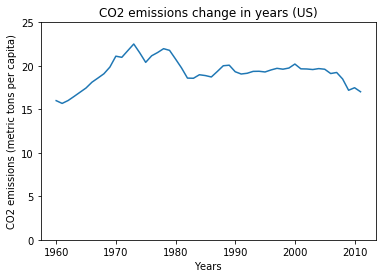

In [13]:
co2 = short_data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')
#forest = data['IndicatorName'].str.contains('Forest area \(%')

country = (short_data['CountryCode'] == "USA")
co2_us  = short_data[co2 & country]
co2_us = co2_us.reset_index(drop = True)
#plt.ylim(0, 30)
plt.xlabel('Years')
plt.ylim(0,25)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions change in years (US)')
plt.plot(co2_us['Year'], co2_us['Value'].values)
plt.show()

In [4]:
co2 = short_data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita')
#forest = data['IndicatorName'].str.contains('Forest area \(%')

country = (short_data['CountryCode'] == "China")
co2_us  = short_data[co2 & country]
co2_us = co2_us.reset_index(drop = True)
#plt.ylim(0, 30)
plt.xlabel('Years')
plt.ylim(0,25)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions change in years (US)')
plt.plot(co2_us['Year'], co2_us['Value'].values)
plt.show()

NameError: name 'short_data' is not defined

It looks like there was a big jump in CO2 emissions in 1960-1970 and after 1980 the CO2 emissions per capita reduced. Of course it can be due to the immigration flock and sudden increase in the population that could lead to the reduction of te per capita amount but that data is not present in our dataset. Usually CO2 emissions change are consistent with its different components that we explored below

### Using Hisograms to explore the distribution of values

In [16]:
# print out the number of elements in hist_data
hist_data = co2_us['Value'].values
print(len(hist_data))

52


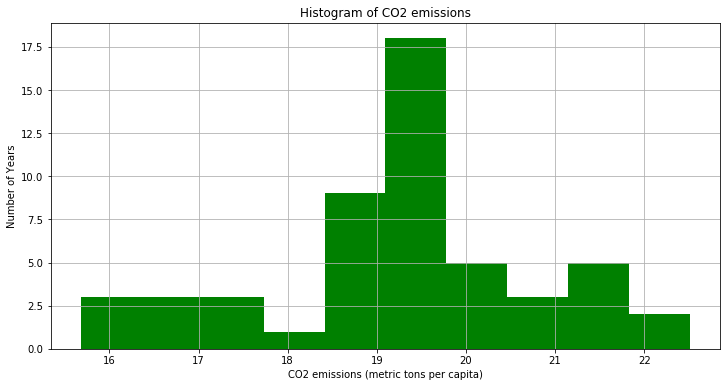

In [26]:
# the histogram of data
plt.figure(figsize=(12,6))
plt.hist(hist_data, 10, density=False, facecolor='green')
plt.xlabel(co2_us['IndicatorName'].iloc[0])
plt.ylabel('Number of Years')
plt.title('Histogram of CO2 emissions')
plt.grid()
plt.show()

So the USA has many years where it produced between 19-20 metric tons per capita.

### How do the USA numbers relate to those of other countries?

In [28]:
hist_indicator = "CO2 emissions \(metric tons per capita"
hist_year = 2011

mask1 = short_data['IndicatorName'].str.contains(hist_indicator)
mask2 = short_data['Year'].isin([hist_year])

# apply mask

co2_2011 = short_data[mask1 & mask2]
co2_2011.head()

,CountryCode,IndicatorName,Year,Value
5026275,ARB,CO2 emissions (metric tons per capita),2011,4.724500
5026788,CSS,CO2 emissions (metric tons per capita),2011,9.692960
5027295,CEB,CO2 emissions (metric tons per capita),2011,6.911131
5027870,EAS,CO2 emissions (metric tons per capita),2011,5.859548
5028456,EAP,CO2 emissions (metric tons per capita),2011,5.302499


Just looking at this values we can see that the US numbers are way too high than the rest of the world. Let's create a histogram that contains all the countries as well as the USA.

Let's see how many countries we have in this new dataset

In [29]:
print(len(co2_2011))

232


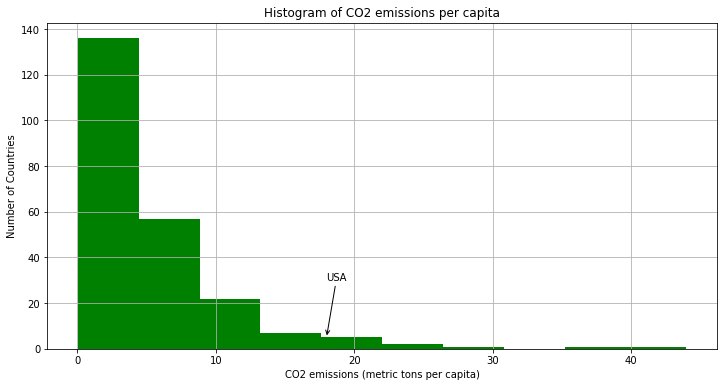

In [30]:
# Let's plot a histogram of the emissions per capita by country

fig, ax = plt.subplots(figsize=(12,6))
ax.annotate("USA", xy = (18,5), xycoords = 'data',
           xytext=(18,30), textcoords='data', arrowprops = dict(arrowstyle="->", connectionstyle = "arc3"))

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 emissions per capita')
plt.grid()
plt.show()

It looks like USA is the real outlier here

In [1]:
short_data[short_data['IndicatorName'].str.contains('energy')]['IndicatorName'].unique()

NameError: name 'short_data' is not defined

### CO2 Emissions have different sources

* CO2 emissions from gaseous fuel consumption (% of total)
* CO2 emissions from liquid fuel consumption (% of total)
* CO2 emissions from electricity and heat production, total (% of total fuel combustion)
* CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
* CO2 emissions from transport (% of total fuel combustion)


As we see, the values of these different CO2 emissions differ. So let's bring them to Per Capita unit first and store them in 
separate dataframes

In [2]:
co2_mask = short_data['IndicatorName'].str.contains("CO2 emissions \(metric tons per capita")
co2_us = short_data[co2_mask & country]
co2_us = co2_us.reset_index(drop = True)
print(f"Data contains period from {co2_us['Year'].min()} to {co2_us['Year'].max()}")

NameError: name 'short_data' is not defined

In [ ]:
gas_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from gaseous fuel consumption \(% of total")
gas_fuel = short_data[gas_fuel_mask & country]
gas_fuel = gas_fuel.reset_index(drop = True)
print(f"Data contains period from {gas_fuel['Year'].min()} to {gas_fuel['Year'].max()}")

In [ ]:
liq_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from liquid fuel consumption \(% of total")
liq_fuel = short_data[liq_fuel_mask & country]
liq_fuel = liq_fuel.reset_index(drop = True)
print(f"Data contains period from {liq_fuel['Year'].min()} to {liq_fuel['Year'].max()}")

In [ ]:
sol_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from solid fuel consumption \(% of total")
sol_fuel = short_data[sol_fuel_mask & country]
sol_fuel = sol_fuel.reset_index(drop = True)
print(f"Data contains period from {sol_fuel['Year'].min()} to {sol_fuel['Year'].max()}")

The following three indicators are more of breakdown of the fuel usage based on the industry. Can be something interesting to look at later

In [ ]:
elec_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from electricity and heat production, total \(% of total fuel combustion")
elec_fuel = short_data[elec_fuel_mask & country]
elec_fuel = elec_fuel.reset_index(drop = False)
print(f"Data contains period from {elec_fuel['Year'].min()} to {elec_fuel['Year'].max()}")

In [ ]:
ind_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from manufacturing industries and construction \(% of total fuel combustion")
ind_fuel = short_data[ind_fuel_mask & country]
ind_fuel = ind_fuel.reset_index(drop = False)
print(f"Data contains period from {ind_fuel['Year'].min()} to {ind_fuel['Year'].max()}")

In [ ]:
trans_fuel_mask = short_data['IndicatorName'].str.contains("CO2 emissions from transport \(% of total fuel combustion")
trans_fuel = short_data[trans_fuel_mask & country]
trans_fuel = trans_fuel.reset_index(drop = True)
print(f"Data contains period from {trans_fuel['Year'].min()} to {trans_fuel['Year'].max()}")

We can see that some of these indicators does not possess data for 2012 year. Therefore it is important to restrict our analysis to the period from 1960 to 2011. For that, we have to leave 2012 data out from all applicable datasets.

In [ ]:
elec_fuel = elec_fuel[elec_fuel['Year'] < 2012]
ind_fuel = ind_fuel[ind_fuel['Year'] < 2012]
trans_fuel = trans_fuel[trans_fuel['Year'] < 2012]
print(f"Data contains period from {elec_fuel['Year'].min()} to {elec_fuel['Year'].max()}")
print(f"Data contains period from {ind_fuel['Year'].min()} to {ind_fuel['Year'].max()}")
print(f"Data contains period from {trans_fuel['Year'].min()} to {trans_fuel['Year'].max()}")

Let's fix the values we are going to be workign with. All mentioned CO2 emission sources will be compared against the CO2 emissions (metric tons per capita), therefore it is important that the values for all indicators are in metric tons per capita as well.


In [ ]:
gas_fuel['gas_val_pc'] = gas_fuel['Value']/100 * co2_us['Value']
liq_fuel['liq_val_pc'] = liq_fuel['Value']/100 * co2_us['Value']
sol_fuel['sol_val_pc'] = sol_fuel['Value']/100 * co2_us['Value']

It is time to merge our three datasets into one and conduct data analysis process. But before that we have to make sure that the indicator columns are named distinctively.

In [ ]:
co2_us = co2_us.rename(columns={'IndicatorName': 'CO2_Indicator', 'Value': 'co2_val_pc'})
gas_fuel = gas_fuel.rename(columns={'IndicatorName': 'Gas_Indicator', 'Value': 'Gas_Val'})
liq_fuel = liq_fuel.rename(columns={'IndicatorName': 'Liquid_Indicator', 'Value': 'Liq_Val'})
sol_fuel = sol_fuel.rename(columns={'IndicatorName': 'Solid_Indicator', 'Value': 'Sol_Val'})

In [ ]:
merge1 = pd.merge(co2_us, gas_fuel, how='outer')
merge2 = pd.merge(liq_fuel, sol_fuel, how='outer')
fuel_df = pd.merge(merge1, merge2, how='outer')

Let's see the final percentage of CO2 emissions from  three fuel consumption indicator values per capita of the total CO2 emission per capita by adding one column: 

In [ ]:
fuel_df['% of Total'] = fuel_df['Gas_Val'] + fuel_df['Liq_Val'] + fuel_df['Sol_Val']
fuel_df

# 2. Data Exploration


#### At this point, we have a good dataset to explore. Let's see the correlation between different components of sources of CO2 emission

In [ ]:
fuel_df[['co2_val_pc','gas_val_pc', 'liq_val_pc', 'sol_val_pc']].corr()

We can observe from above table that there is strong correlation between the co2 emission per capita and liquid fuel consumption per capita. There is also strong relation betweehn the co2 emission and the gaseous fuel consumption. 

Let's plot for a better visualization

In [ ]:
plt.figure('co2', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['co2_val_pc'])
plt.title('CO2 emissions change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.figure('gas', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['gas_val_pc'])
plt.title('CO2 emissions from Gaseous Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.figure('liquid', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['liq_val_pc'])
plt.title('CO2 emissions from Liquid Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.figure('solid', figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['sol_val_pc'])
plt.title('CO2 emissions from Solid Fuel change in Years')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')
plt.show()

At this point we have multiple metrics that have different dimension. Let's put all metrics in one plot and see how they compare against each other.

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(fuel_df['Year'], fuel_df['co2_val_pc'], label='Total CO2 emissions')
plt.title('Comparison of different sources of CO2 emission')
plt.xlabel('Year')
plt.ylabel('Metric Tons Per Capita')
plt.xticks(np.arange(min(fuel_df['Year']), max(fuel_df['Year'])+1, 3.0), rotation='vertical')

plt.plot(fuel_df['Year'], fuel_df['gas_val_pc'], label='CO2 emissions from Gaseous Fuel')

plt.plot(fuel_df['Year'], fuel_df['liq_val_pc'], label='CO2 emissions from Liquid Fuel')

plt.plot(fuel_df['Year'], fuel_df['sol_val_pc'], label='CO2 emissions from Solid Fuel')

plt.legend()
plt.show()

### Let's now look at the correlation between the pump price for gasoline and CO2 emission from liquid fuel.


In [ ]:
pump_mask = short_data['IndicatorName'].str.contains("Pump price for gasoline \(US")
pump_us = short_data[pump_mask & country]
pump_us = pump_us.reset_index(drop = True)
print(f"Data contains period from {pump_us['Year'].min()} to {pump_us['Year'].max()}")
pump_us = pump_us.rename(columns={'IndicatorName': 'pump_indicator', 'Value': 'pump_val'})
years_list = pump_us['Year'].unique().tolist()
years_list

#### The pump price for gasoline in USD per liter does contain the fraction of the period we were analyzing. Therefore we analyze the data for years of intersection.

In [ ]:
short_liq_fuel = liq_fuel[liq_fuel['Year'].isin(years_list)]
short_liq_fuel = short_liq_fuel.reset_index(drop = True)
short_pump_us = pump_us[pump_us['Year'] < 2012]
short_pump_us = short_pump_us.reset_index(drop = True)

In [ ]:
pump_liq = pd.merge(short_liq_fuel, short_pump_us, how='outer')
pump_liq

In [ ]:
pump_liq[['liq_val_pc', 'pump_val']].corr()

Of course we just have 9 data points and that  is not sufficient to prove any hypotheses but it is worth to mention that CO2 emissions from Liquid Fuel consumption has inverse correlation with pump prices accross the US. It means that the people tend to reduce the fuel consumption when the gas prices go up. Let's analyze the alternative fuel usage accross the US.